<a href="https://colab.research.google.com/github/CunninghamLab/Publication-Data/blob/main/1_Submitted_Jin%20et%20al_2025/Jin_Yuk_et_al_2025_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: I want these libraries: library(lme4)
# library(lmerTest)
# library(ggplot2)
# library(emmeans)
# library(dplyr)
# library(performance)
# library(broom)
# library(ggpubr)

# Install necessary packages if not already installed
install.packages("lme4")
install.packages("lmerTest")
install.packages("ggplot2")
install.packages("emmeans")
install.packages("dplyr")
install.packages("performance")
install.packages("broom")
install.packages("ggpubr")
install.packages("car")
install.packages("curl")
install.packages("visreg")

# Load libraries
library(lme4)
library(lmerTest)
library(ggplot2)
library(emmeans)
library(dplyr)
library(performance)
library(broom)
library(ggpubr)
library(car)
library(curl)
library(visreg)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Number of participants included: 12 
Included SubIDs:
 [1] A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073
Levels: A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073
   n mean_LagMax sd_LagMax min_LagMax max_LagMax mean_LagTime sd_LagTime
1 12       0.425     0.113      0.229      0.625        0.422      3.067
  min_LagTime max_LagTime
1      -6.957       5.659



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.97157, p-value = 0.9266


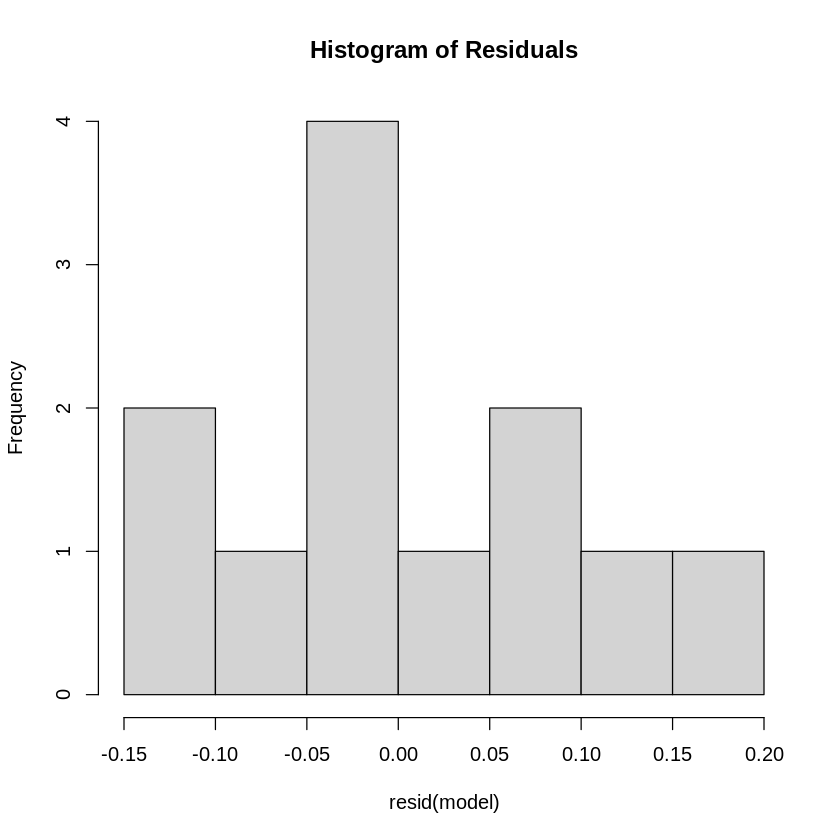

Analysis of Variance Table

Response: LagMax
          Df   Sum Sq  Mean Sq F value  Pr(>F)  
UEFM       1 0.047991 0.047991  5.1774 0.04615 *
Residuals 10 0.092693 0.009269                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


`geom_smooth()` using formula = 'y ~ x'


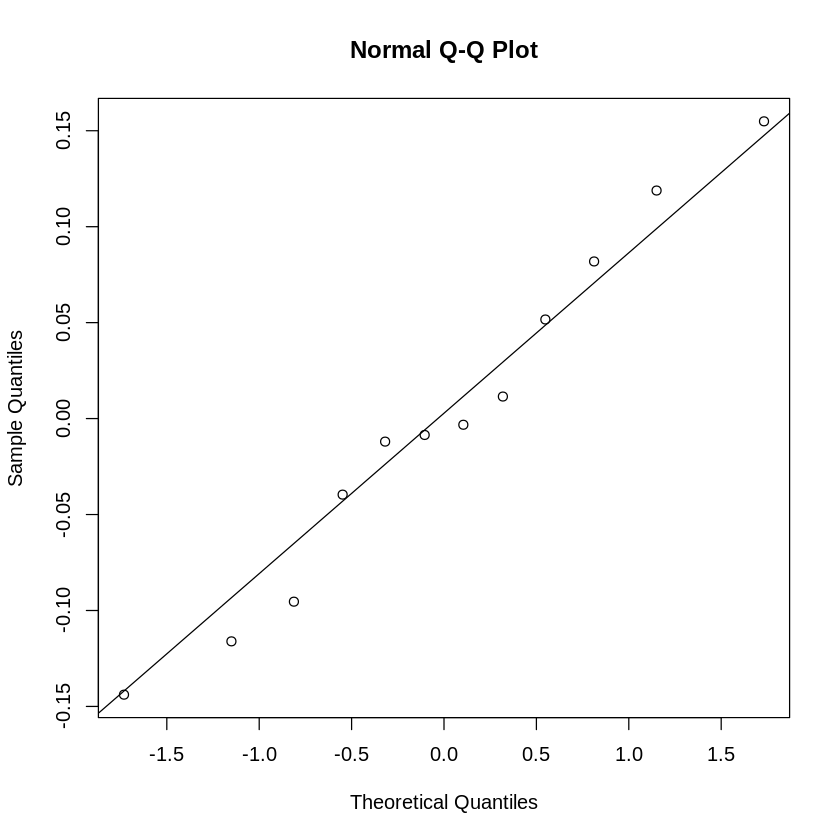

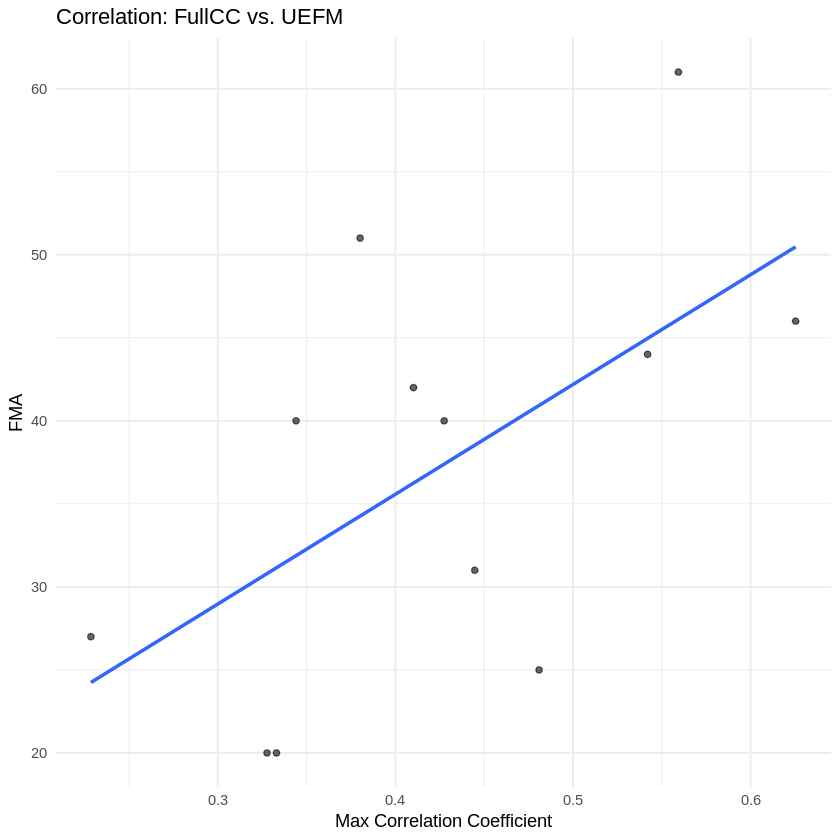

In [5]:
# ----------------------------------------------
# 1. Correlation: FullCC and UEFM
# ----------------------------------------------
# Raw GitHub URL
# Use base R url() instead of curl() for problematic paths
url <- "https://raw.githubusercontent.com/CunninghamLab/Publication-Data/refs/heads/main/1_Submitted_Jin_et_al_2025/Data/R_Data_1_CCvsUEFM.csv"

data_1 <- read.csv(url(url),
                   header = TRUE,
                   stringsAsFactors = TRUE,
                   na.strings = c("", "N/A"))

group_a <- data_1 %>%
  # filter(!SubID %in% c("A015", "A016", "A074")) %>%  # Optional exclusions
  filter(!SubID %in% c("A074")) %>%  # Exclude A074 due to missing UEFM
  filter(Group == "A", !is.na(Group), Group != "NA") %>%
  filter(!is.na(PHLevel), PHLevel != "NA") %>%
  mutate(
    SubID   = droplevels(factor(SubID)),
    Group   = droplevels(factor(Group)),
    PHLevel = droplevels(factor(PHLevel))
  )

# Participant summary
included_subjects <- unique(group_a$SubID)
n_subjects <- length(included_subjects)

cat("Number of participants included:", n_subjects, "\n")
cat("Included SubIDs:\n")
print(included_subjects)

# Descriptive statistics
descriptives_all <- group_a %>%
  summarise(
    n            = n(),
    mean_LagMax  = round(mean(LagMax, na.rm = TRUE), 3),
    sd_LagMax    = round(sd(LagMax, na.rm = TRUE), 3),
    min_LagMax   = round(min(LagMax, na.rm = TRUE), 3),
    max_LagMax   = round(max(LagMax, na.rm = TRUE), 3),
    mean_LagTime = round(mean(LagTime, na.rm = TRUE), 3),
    sd_LagTime   = round(sd(LagTime, na.rm = TRUE), 3),
    min_LagTime  = round(min(LagTime, na.rm = TRUE), 3),
    max_LagTime  = round(max(LagTime, na.rm = TRUE), 3)
  )

print(descriptives_all)

# Linear regression model
model <- lm(LagMax ~ UEFM, data = group_a)

# Residual diagnostics
shapiro.test(resid(model))
hist(resid(model), main = "Histogram of Residuals")
qqnorm(resid(model))
qqline(resid(model))

# Model summary
anova_output <- anova(model)
print(anova_output)

# Correlation plot
p_corr <- ggplot(group_a, aes(x = LagMax, y = UEFM)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(
    title = "Correlation: FullCC vs. UEFM",
    x = "Max Correlation Coefficient",
    y = "FMA"
  )

print(p_corr)

Number of participants included: 13 
Included SubIDs:
 [1] A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073 A074
Levels: A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073 A074



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.95705, p-value = 0.1741


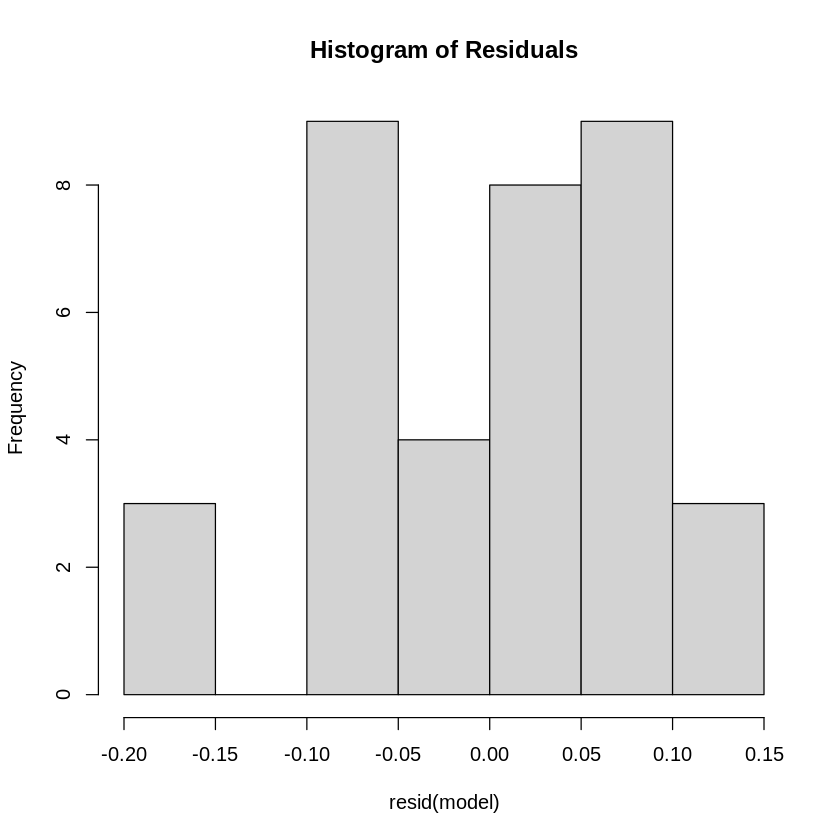

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq  Mean Sq NumDF DenDF F value   Pr(>F)    
Condition 0.47843 0.239213     2    22 25.3309 1.96e-06 ***
UEFM      0.03687 0.036875     1    10  3.9048  0.07637 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
 contrast      estimate     SE df t.ratio p.value
 10_30 - 30_70  -0.1974 0.0397 22  -4.977  0.0002
 10_30 - 10_70  -0.2736 0.0397 22  -6.895  <.0001
 30_70 - 10_70  -0.0761 0.0397 22  -1.918  0.1572

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 3 estimates 
# A tibble: 3 × 6
  Condition     n mean_LagMax sd_LagMax mean_LagTime sd_LagTime
  <fct>     <int>       <dbl>     <dbl>        <dbl>      <dbl>
1 10_30        13       0.408     0.106        0.075      0.481
2 30_70        13       0.606     0.165       -0.057      0.353
3 10_70        13       0.678     0.152        0.086      0.402


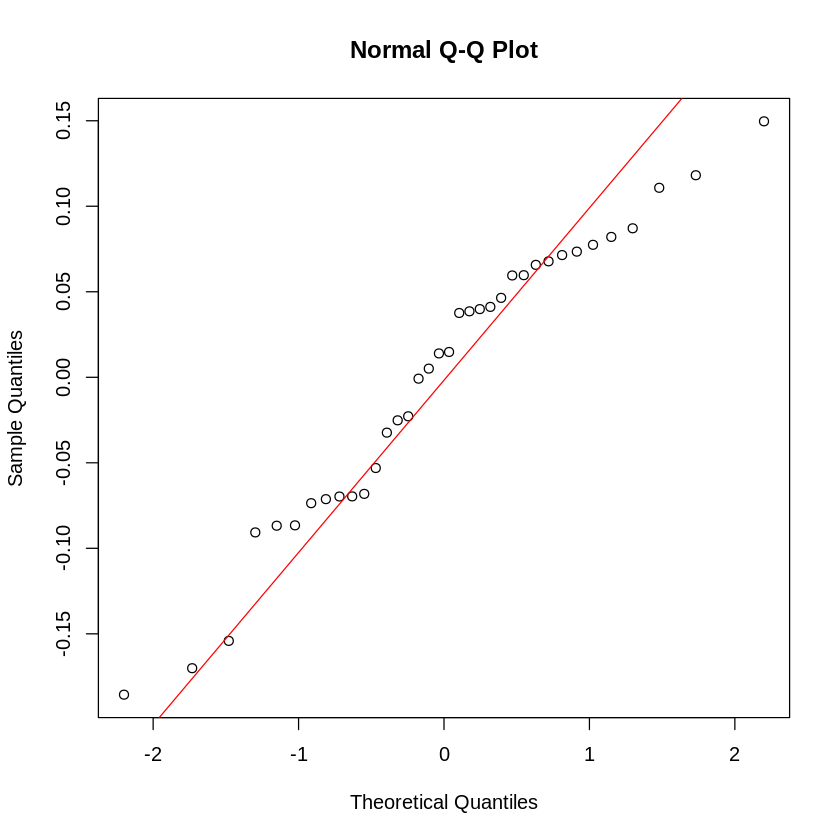

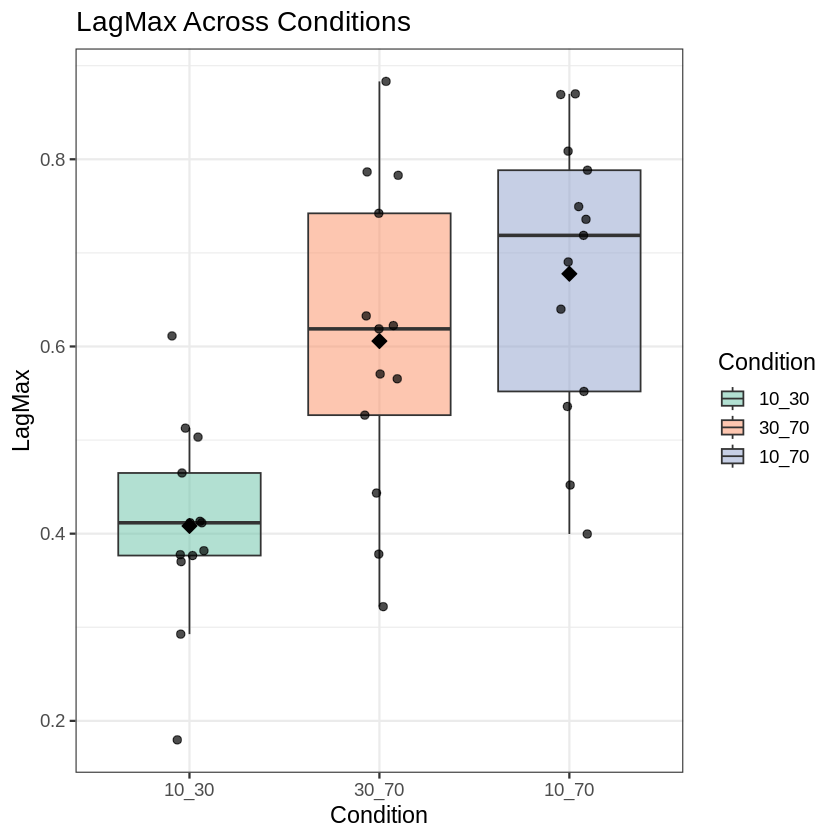

In [6]:
# ----------------------------------------------
# 2. Dynamic-Isometric Low to High: ANOVA and Visualization
# ----------------------------------------------
# Load and clean data
url <- "https://raw.githubusercontent.com/CunninghamLab/Publication-Data/refs/heads/main/1_Submitted_Jin_et_al_2025/Data/R_Data_2_LtoH_Transition.csv"

data_dyn <- read.csv(url(url),
                   header = TRUE,
                   stringsAsFactors = TRUE,
                   na.strings = c("", "N/A"))

data_dyn <- data_dyn %>%
  # Filter out invalid/missing data
  filter(
    # !SubID %in% c("A016", "A073"),
    !is.na(Condition),
    Condition != "NA",
    Condition %in% c("10_30", "30_70", "10_70")
  ) %>%
  mutate(
    SubID    = droplevels(factor(SubID)),
    Condition = factor(Condition, levels = c("10_30", "30_70", "10_70"))
  )

# Output included participants
included_subjects <- unique(data_dyn$SubID)
n_subjects <- length(included_subjects)

cat("Number of participants included:", n_subjects, "\n")
cat("Included SubIDs:\n")
print(included_subjects)

# Linear mixed model
model <- lmer(LagMax ~ Condition + UEFM +  (1 | SubID), data = data_dyn)

# Residual diagnostics
shapiro.test(resid(model))
hist(resid(model), main = "Histogram of Residuals")
qqnorm(resid(model)); qqline(resid(model), col = "red")

# ANOVA
anova_output <- anova(model)

# Post-hoc pairwise comparisons with Tukey correction
emm <- emmeans(model, ~ Condition)
pairwise_comparisons <- contrast(emm, method = "pairwise", adjust = "Tukey")
emmeans_pairwise <- summary(pairwise_comparisons)

# Descriptive statistics by condition
descriptives_transition <- data_dyn %>%
  group_by(Condition) %>%
  summarise(
    n            = n(),
    mean_LagMax  = round(mean(LagMax, na.rm = TRUE), 3),
    sd_LagMax    = round(sd(LagMax, na.rm = TRUE), 3),
    mean_LagTime = round(mean(LagTime, na.rm = TRUE), 3),
    sd_LagTime   = round(sd(LagTime, na.rm = TRUE), 3)
  )

# Print to console
print(anova_output)
print(emmeans_pairwise)
print(descriptives_transition)

# Visualization
p_dyn <- ggplot(data_dyn, aes(x = Condition, y = LagMax)) +
  geom_boxplot(aes(fill = Condition), alpha = 0.5, outlier.shape = NA) +
  geom_point(position = position_jitter(width = 0.1), size = 2, alpha = 0.7) +
  geom_point(stat = "summary", fun = mean, shape = 23, size = 3, fill = "black") +
  scale_fill_brewer(palette = "Set2") +
  theme_bw(base_size = 14) +
  labs(title = "LagMax Across Conditions", y = "LagMax", x = "Condition")

print(p_dyn)

Number of participants included: 11 
Included SubIDs:
 [1] A002 A004 A005 A007 A014 A015 A017 A025 A055 A067 A074
Levels: A002 A004 A005 A007 A014 A015 A017 A025 A055 A067 A074


boundary (singular) fit: see help('isSingular')




	Shapiro-Wilk normality test

data:  resid(model)
W = 0.98307, p-value = 0.3147


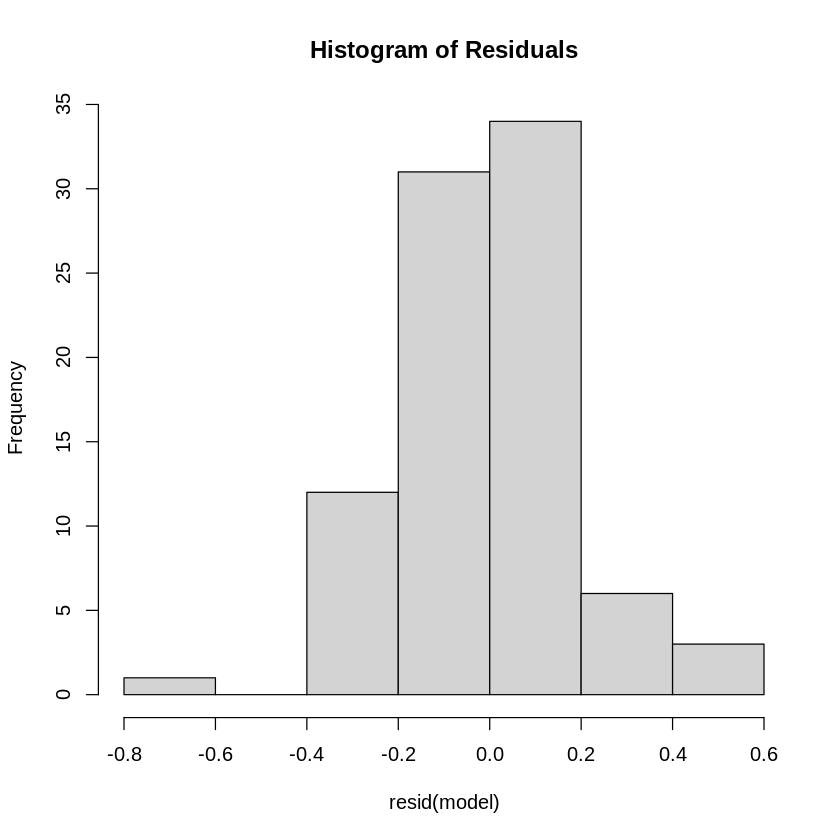

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
NPHLevel         1.98065 0.99032     2    77 24.9580 4.411e-09 ***
PHLevel          1.69671 0.84836     2    77 21.3801 4.120e-08 ***
UEFM             0.64066 0.64066     1    77 16.1457 0.0001355 ***
NPHLevel:PHLevel 0.56429 0.14107     4    77  3.5553 0.0102670 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MEPRatio_transformed ~ NPHLevel * PHLevel + UEFM + (1 | SubID)
   Data: data

REML criterion at convergence: 0

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.11520 -0.60851 -0.03369  0.57251  2.57554 

Random effects:
 Groups   Name        Variance Std.Dev.
 SubID    (Intercept) 0.00000  0.0000  
 Residual             0.03968  0.1992  
Number of obs: 87, groups:  SubID, 10

Fixed effects:
                         

NOTE: Results may be misleading due to involvement in interactions

NOTE: Results may be misleading due to involvement in interactions



# A tibble: 9 × 6
  NPHLevel PHLevel     n mean_MEPRatio sd_MEPRatio se_MEPRatio
  <fct>    <fct>   <int>         <dbl>       <dbl>       <dbl>
1 10       Rest       11         1.21        0.3         0.09 
2 10       Five       10         1.13        0.261       0.083
3 10       Thirty     11         0.936       0.14        0.042
4 30       Rest       11         1.52        0.64        0.193
5 30       Five       10         1.22        0.267       0.084
6 30       Thirty     11         0.879       0.175       0.053
7 70       Rest       11         3.02        1.65        0.497
8 70       Five       10         2.04        0.924       0.292
9 70       Thirty     11         1.15        0.342       0.103
   n  mean    sd   min   max
1 11 1.146 0.342 0.603 1.622


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


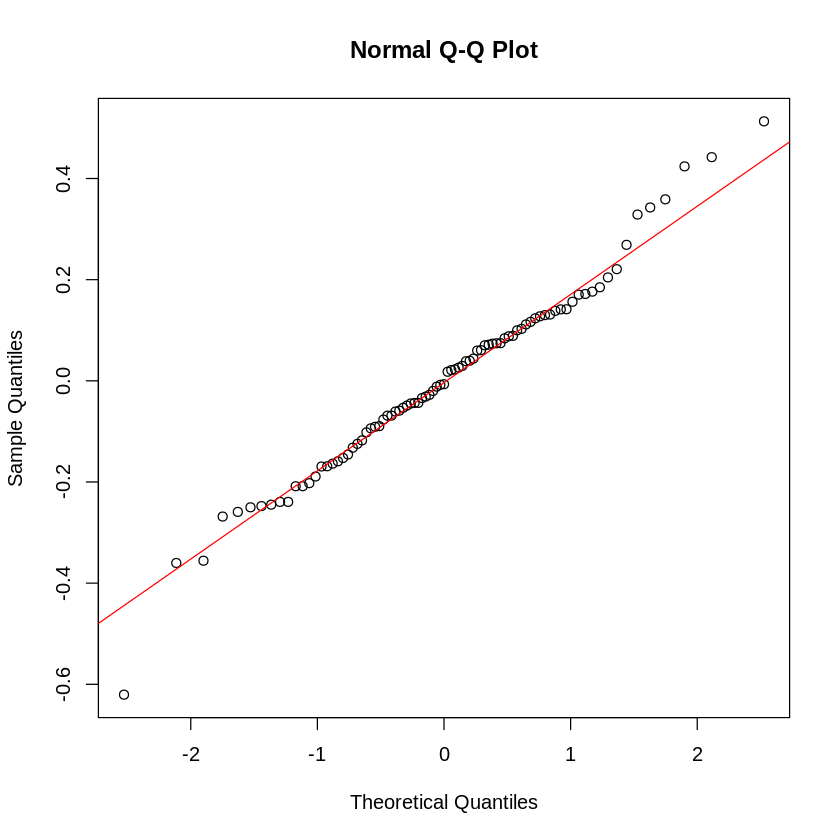

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


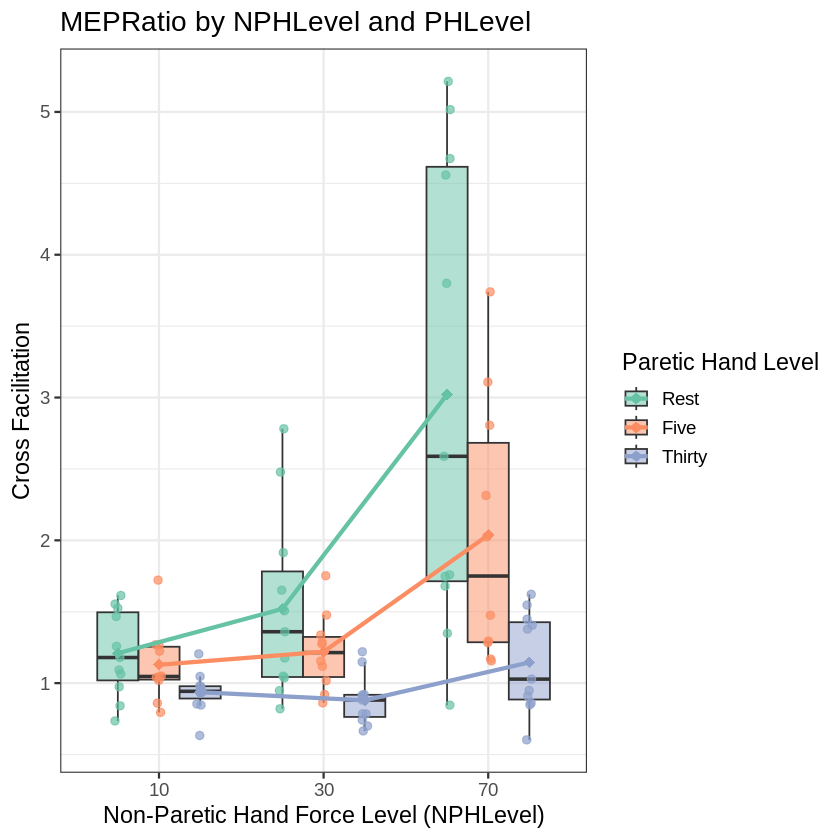

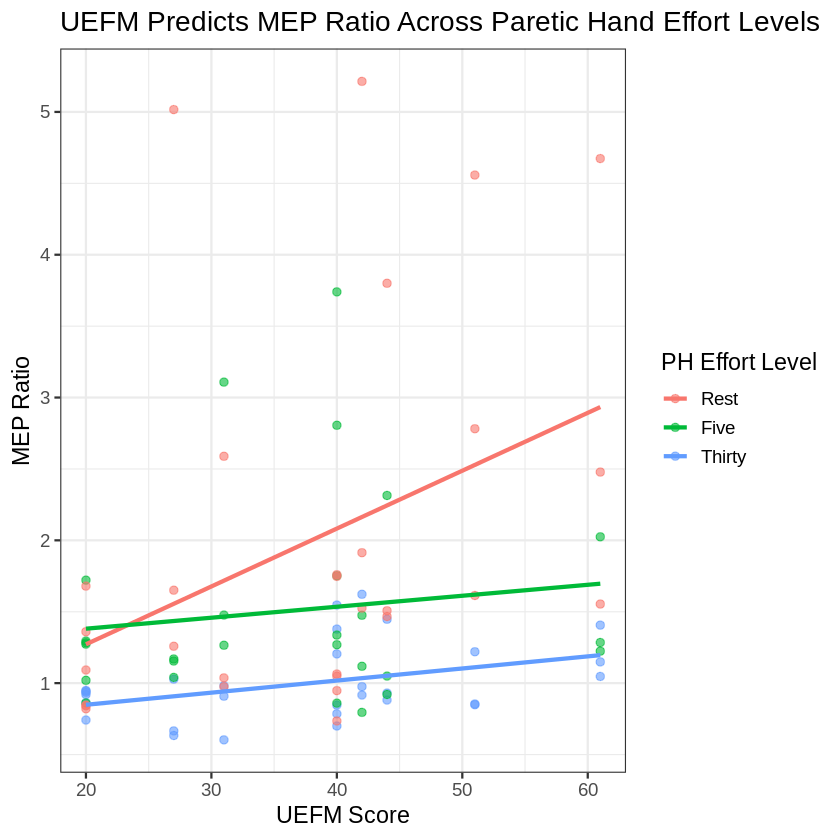

In [7]:
# ----------------------------------------------
# 3. Cross Facilitation: MEP Ratio Analysis
# ----------------------------------------------
# --- Load and clean data ---
url <- "https://raw.githubusercontent.com/CunninghamLab/Publication-Data/refs/heads/main/1_Submitted_Jin_et_al_2025/Data/R_Data_3_CF.csv"

data <- read.csv(url(url),
        header = TRUE,
        stringsAsFactors = TRUE,
        na.strings = c("", "N/A"))

data <- data %>%
  filter(!SubID %in% c("A016", "A073")) %>%
  filter(!Condition %in% c("Condition", "R_R", "5_R", "30_R")) %>%
  mutate(
    SubID       = droplevels(factor(SubID)),
    PHLevel     = droplevels(factor(PHLevel, levels = c("Rest", "Five", "Thirty"))),
    NPHLevel    = factor(NPHLevel, levels = c("10", "30", "70")),
    Condition   = droplevels(factor(Condition)),
    group_label = interaction(NPHLevel, PHLevel, sep = ".")
  )

# --- Participant summary ---
included_subjects <- unique(data$SubID)
n_subjects <- length(included_subjects)

cat("Number of participants included:", n_subjects, "\n")
cat("Included SubIDs:\n")
print(included_subjects)

# --- Transform outcome variable ---
data$MEPRatio_transformed <- log(data$MEPRatio + 1)

# --- Fit linear mixed-effects model ---
model <- lmer(MEPRatio_transformed ~ NPHLevel * PHLevel + UEFM + (1 | SubID), data = data)

# --- Residual diagnostics ---
shapiro.test(resid(model))
hist(resid(model), main = "Histogram of Residuals")
qqnorm(resid(model)); qqline(resid(model), col = "red")

# --- Type III ANOVA Table ---
anova_output <- anova(model)
summary_output <- summary(model)
print(anova_output)
print(summary_output)

# --- Estimated marginal means and post-hoc comparisons ---
main_PH  <- tidy(contrast(emmeans(model, ~ PHLevel), method = "pairwise", adjust = "Tukey"))
main_NPH <- tidy(contrast(emmeans(model, ~ NPHLevel), method = "pairwise", adjust = "Tukey"))
simple_PH_by_NPH <- tidy(contrast(emmeans(model, ~ PHLevel | NPHLevel), method = "pairwise", adjust = "Tukey"))
simple_NPH_by_PH <- tidy(contrast(emmeans(model, ~ NPHLevel | PHLevel), method = "pairwise", adjust = "Tukey"))

# --- Descriptive statistics by group ---
descriptives_cf <- data %>%
  group_by(NPHLevel, PHLevel) %>%
  summarise(
    n = n(),
    mean_MEPRatio = round(mean(MEPRatio, na.rm = TRUE), 3),
    sd_MEPRatio   = round(sd(MEPRatio, na.rm = TRUE), 3),
    se_MEPRatio   = round(sd_MEPRatio / sqrt(n), 3),
    .groups = "drop"
  )
print(descriptives_cf)

# --- Focused descriptives: NPH = 70, PH = Thirty ---
descriptives_70_30 <- data %>%
  filter(NPHLevel == "70", PHLevel == "Thirty") %>%
  summarise(
    n    = n(),
    mean = round(mean(MEPRatio, na.rm = TRUE), 3),
    sd   = round(sd(MEPRatio, na.rm = TRUE), 3),
    min  = round(min(MEPRatio, na.rm = TRUE), 3),
    max  = round(max(MEPRatio, na.rm = TRUE), 3)
  )
print(descriptives_70_30)

# --- Visualization: Boxplot with Means and Connecting Lines ---
p_cf <- ggplot(data, aes(x = NPHLevel, y = MEPRatio, fill = PHLevel)) +
  geom_boxplot(position = position_dodge(width = 0.75), alpha = 0.5, outlier.shape = NA) +
  geom_point(
    aes(color = PHLevel),
    position = position_jitterdodge(jitter.width = 0.1, dodge.width = 0.75),
    size = 2,
    alpha = 0.7
  ) +
  stat_summary(
    aes(group = PHLevel, color = PHLevel),
    fun = mean,
    geom = "line",
    position = position_dodge(width = 0.75),
    size = 1.2
  ) +
  stat_summary(
    aes(group = PHLevel, color = PHLevel),
    fun = mean,
    geom = "point",
    position = position_dodge(width = 0.75),
    size = 3,
    shape = 18
  ) +
  scale_fill_brewer(palette = "Set2") +
  scale_color_brewer(palette = "Set2") +
  theme_bw(base_size = 14) +
  labs(
    title = "MEPRatio by NPHLevel and PHLevel",
    x = "Non-Paretic Hand Force Level (NPHLevel)",
    y = "Cross Facilitation",
    fill = "Paretic Hand Level",
    color = "Paretic Hand Level"
  )

print(p_cf)

# --- Visualization: UEFM Effect Plot ---
p_uefm <- ggplot(data, aes(x = UEFM, y = MEPRatio, color = PHLevel)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, size = 1.2) +
  theme_bw(base_size = 14) +
  labs(
    title = "UEFM Predicts MEP Ratio Across Paretic Hand Effort Levels",
    x = "UEFM Score",
    y = "MEP Ratio",
    color = "PH Effort Level"
  )

print(p_uefm)

Number of participants included: 9 
Included SubIDs:
[1] A002 A004 A005 A007 A014 A015 A025 A055 A067
Levels: A002 A004 A005 A007 A014 A015 A025 A055 A067


boundary (singular) fit: see help('isSingular')




	Shapiro-Wilk normality test

data:  resid(model)
W = 0.93371, p-value = 0.08528


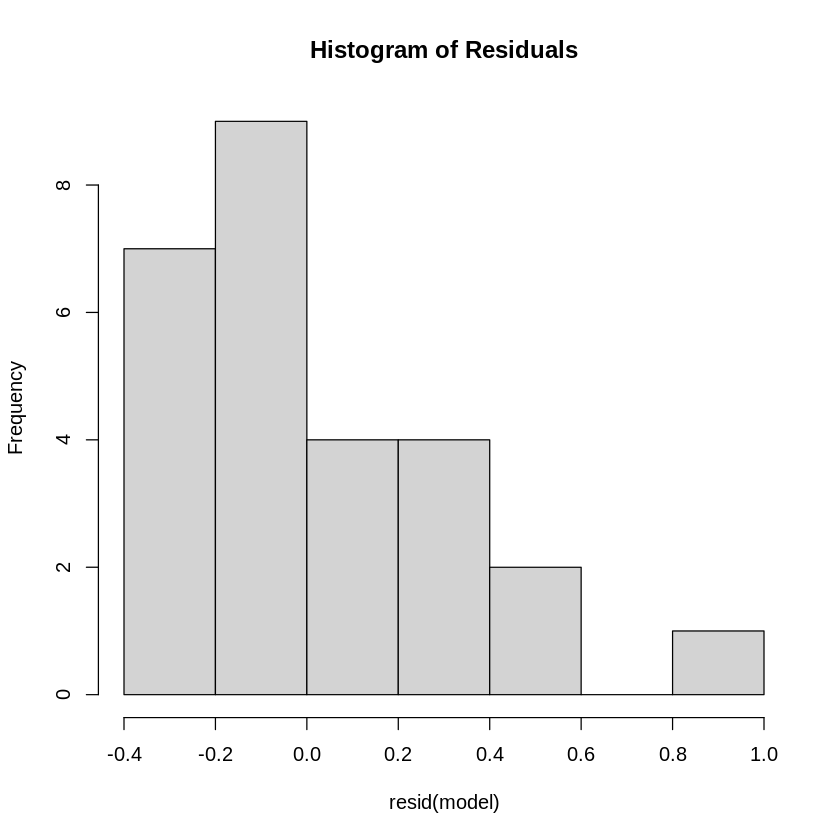

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF DenDF F value  Pr(>F)  
Condition 0.71194 0.35597     2    23  3.7574 0.03872 *
UEFM      0.09620 0.09620     1    23  1.0155 0.32408  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
 contrast                  estimate    SE df t.ratio p.value
 Condition10 - Condition30  -0.0979 0.145 16  -0.675  0.7811
 Condition10 - Condition70   0.2849 0.145 16   1.963  0.1536
 Condition30 - Condition70   0.3828 0.145 16   2.638  0.0447

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 3 estimates 
 Condition emmean    SE   df null t.ratio p.value
 10         1.028 0.103 22.9    1   0.269  0.7906
 30         1.126 0.103 22.9    1   1.223  0.2336
 70         0.743 0.103 22.9    1  -2.508  0.0197

Degrees-of-freedom method: kenward-roger 
# A tibble: 3 × 6
  Condition     n  mean    sd   min   max
  <fct>     <int> <dbl> <dbl> <dbl> <db

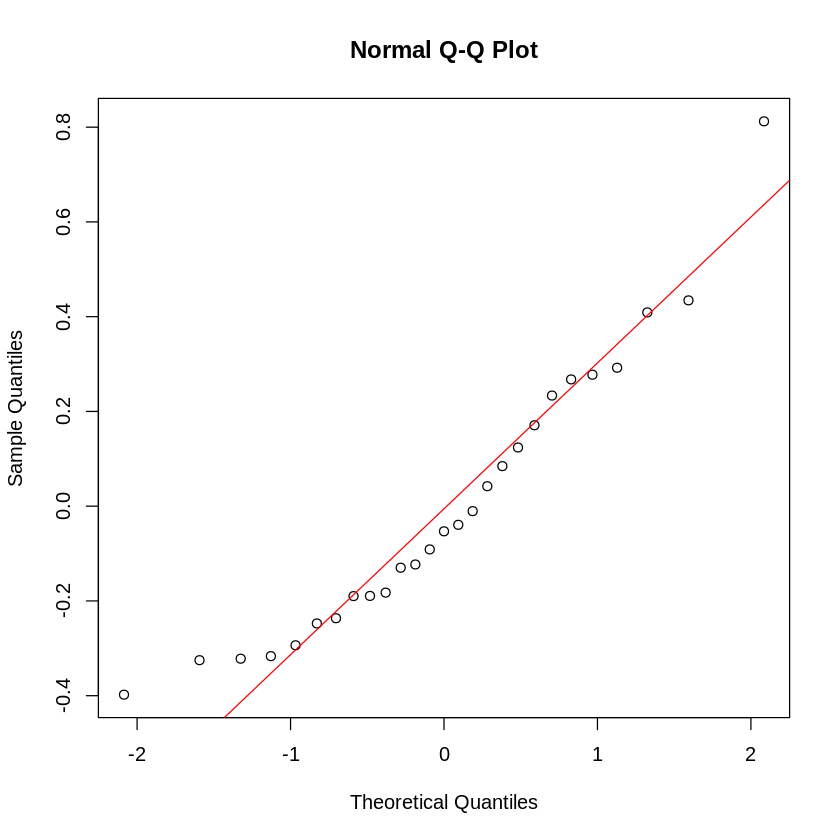

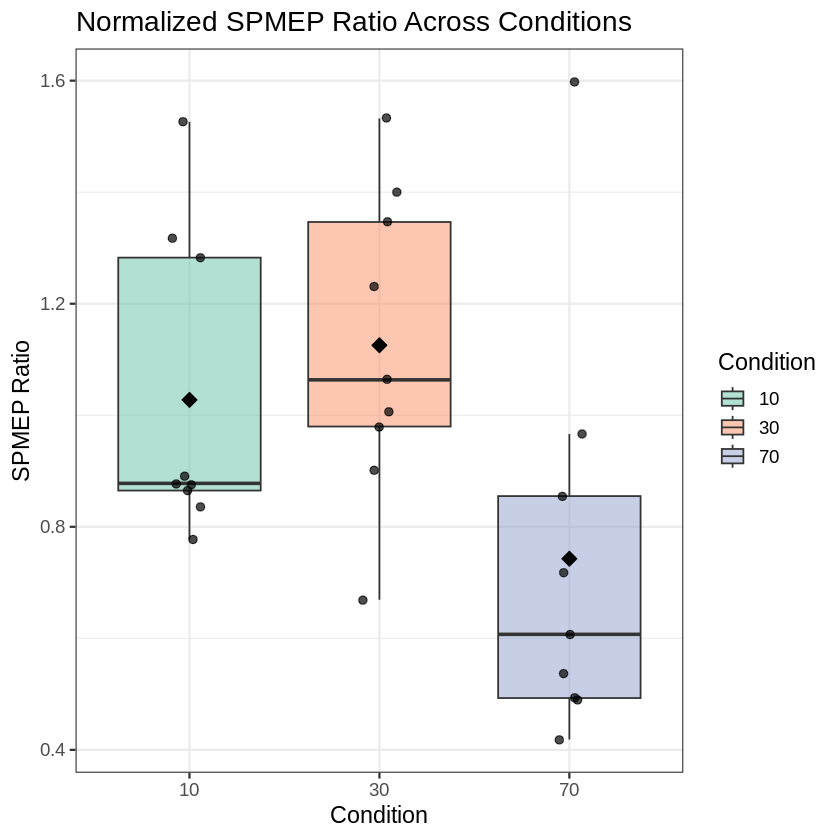

In [8]:
# ----------------------------------------------
# 4. Intracortical Inhibition
# ----------------------------------------------

# --- Load and clean data ---
url <- "https://raw.githubusercontent.com/CunninghamLab/Publication-Data/refs/heads/main/1_Submitted_Jin_et_al_2025/Data/R_Data_4_ICI.csv"

data <- read.csv(url(url),
        header = TRUE,
        stringsAsFactors = TRUE,
        na.strings = c("", "N/A"))

data <- data %>%
  filter(Condition %in% c("10", "30", "70")) %>%
  filter(!SubID %in% c("A016", "A073", "A017", "A074")) %>%  # Excluded: no MEP or unidentifiable CSP
  mutate(
    SubID     = droplevels(factor(SubID)),
    Condition = factor(Condition, levels = c("10", "30", "70"))
  )

# --- Participant summary ---
included_subjects <- unique(data$SubID)
n_subjects <- length(included_subjects)

cat("Number of participants included:", n_subjects, "\n")
cat("Included SubIDs:\n")
print(included_subjects)

# --- Fit linear mixed-effects model ---
model <- lmer(Unilateral.Normalized.SPMEP.Ratio ~ Condition + UEFM + (1 | SubID), data = data)

# --- Residual diagnostics ---
shapiro.test(resid(model))
hist(resid(model), main = "Histogram of Residuals")
qqnorm(resid(model)); qqline(resid(model), col = "red")

# --- ANOVA ---
anova_output <- anova(model)
print(anova_output)

# --- Estimated marginal means ---
emm <- emmeans(model, ~ Condition)

# --- Post-hoc pairwise comparisons (Tukey-adjusted) ---
posthoc_pairwise <- contrast(emm, method = "pairwise", adjust = "Tukey")
summary_pairwise <- summary(posthoc_pairwise)
print(summary_pairwise)

# --- One-sample test: Is each condition different from 1.0? ---
summary_vs_1 <- test(emm, null = 1.0)  # Test against baseline of 1.0 (not log-transformed)
print(summary_vs_1)

# --- Descriptive stats (original scale) ---
descriptives <- data %>%
  group_by(Condition) %>%
  summarise(
    n    = n(),
    mean = round(mean(Unilateral.Normalized.SPMEP.Ratio, na.rm = TRUE), 3),
    sd   = round(sd(Unilateral.Normalized.SPMEP.Ratio, na.rm = TRUE), 3),
    min  = round(min(Unilateral.Normalized.SPMEP.Ratio, na.rm = TRUE), 3),
    max  = round(max(Unilateral.Normalized.SPMEP.Ratio, na.rm = TRUE), 3),
    .groups = "drop"
  )
print(descriptives)

# --- Visualization: Boxplot with means ---
p_dyn <- ggplot(data, aes(x = Condition, y = Unilateral.Normalized.SPMEP.Ratio)) +
  geom_boxplot(aes(fill = Condition), alpha = 0.5, outlier.shape = NA) +
  geom_point(position = position_jitter(width = 0.1), size = 2, alpha = 0.7) +
  geom_point(stat = "summary", fun = mean, shape = 23, size = 3, fill = "black") +
  scale_fill_brewer(palette = "Set2") +
  theme_bw(base_size = 14) +
  labs(
    title = "Normalized SPMEP Ratio Across Conditions",
    y = "SPMEP Ratio",
    x = "Condition"
  )

print(p_dyn)

Number of participants included: 9 
Included SubIDs:
[1] A002 A004 A005 A007 A014 A015 A025 A055 A067
Levels: A002 A004 A005 A007 A014 A015 A025 A055 A067



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.9741, p-value = 0.7123


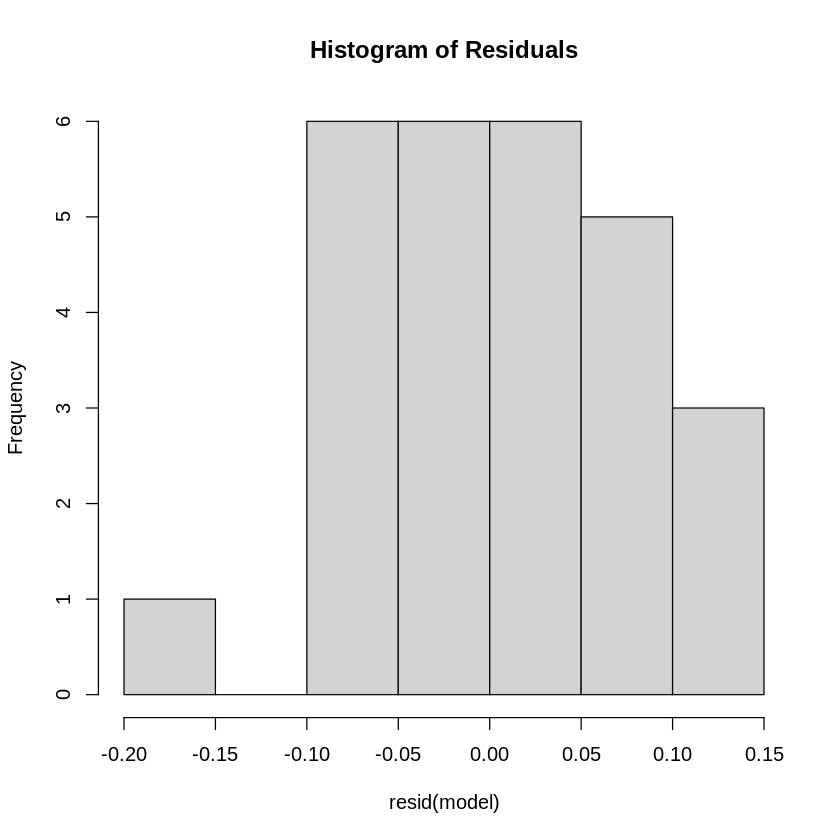

Type III Analysis of Variance Table with Satterthwaite's method
                                             Sum Sq Mean Sq NumDF   DenDF
Unilateral.Normalized.SPMEP.Ratio           0.37562 0.37562     1  7.5859
Condition                                   0.04898 0.02449     2 12.0547
UEFM                                        0.01655 0.01655     1  6.6745
Unilateral.Normalized.SPMEP.Ratio:Condition 0.03622 0.01811     2 10.4848
                                            F value    Pr(>F)    
Unilateral.Normalized.SPMEP.Ratio           40.3374 0.0002757 ***
Condition                                    2.6301 0.1127514    
UEFM                                         1.7777 0.2261345    
Unilateral.Normalized.SPMEP.Ratio:Condition  1.9446 0.1912913    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Unimanual.Normalized.MEP.Ratio ~ Unilateral.Normalized.SPMEP.Ratio *  
   

`geom_smooth()` using formula = 'y ~ x'


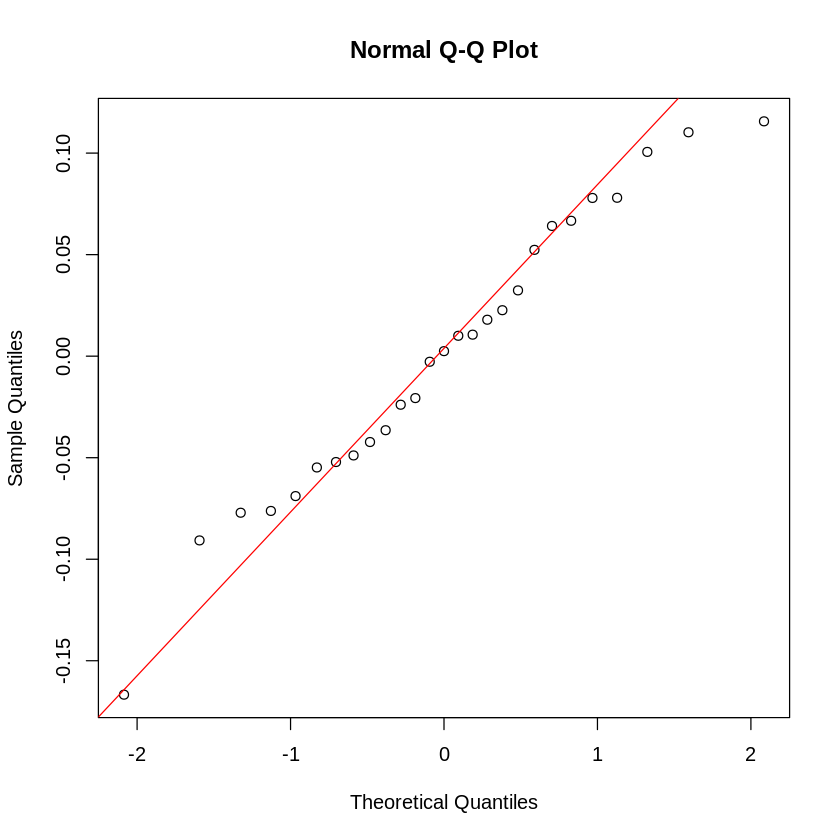

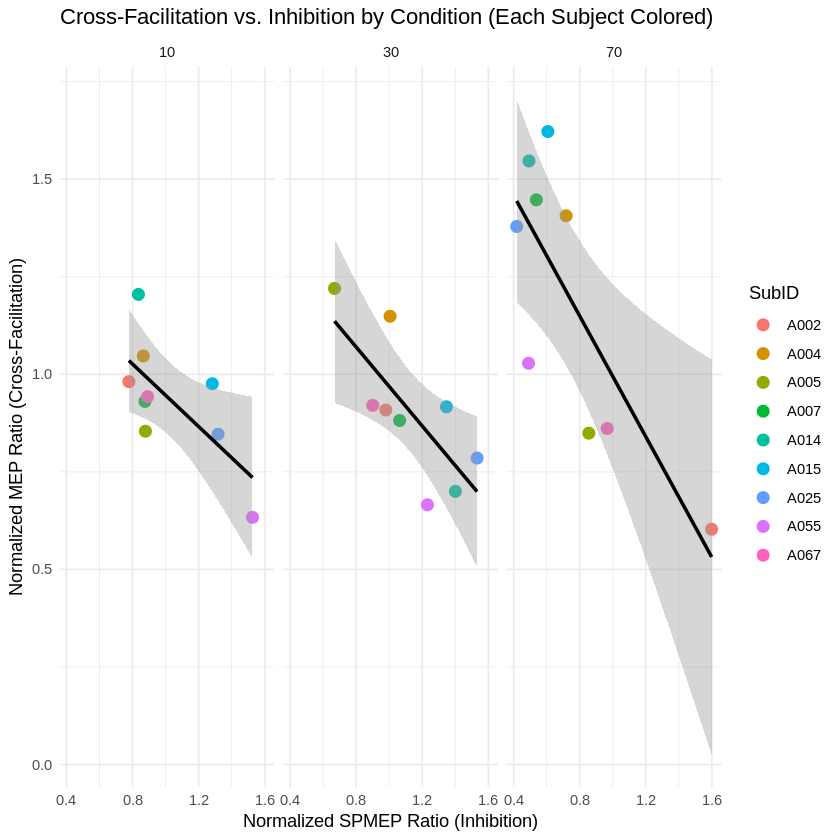

In [ ]:
# ----------------------------------------------
# 5. Intracortical Inhibition and Cross Facilitation
# ----------------------------------------------
url <- "https://raw.githubusercontent.com/CunninghamLab/Publication-Data/refs/heads/main/1_Submitted_Jin_et_al_2025/Data/R_Data_5_ICIvsCF.csv"

data <- read.csv(url(url),
        header = TRUE,
        stringsAsFactors = TRUE,
        na.strings = c("", "N/A"))

data <- data %>%
  filter(
    Condition %in% c("10", "30", "70"),
    !SubID %in% c("A016", "A073", "A017", "A074"),
    !is.na(Condition)
  ) %>%
  mutate(
    SubID = factor(SubID),
    Condition = factor(Condition, levels = c("10", "30", "70")),
    Split.by.Symmetry.Conditions = factor(
      Split.by.Symmetry.Conditions,
      levels = c("More Asymmetry", "Less Asymmetry")
    )
  ) %>%
  droplevels()

# --- Participant summary ---
included_subjects <- unique(data$SubID)
n_subjects <- length(included_subjects)

cat("Number of participants included:", n_subjects, "\n")
cat("Included SubIDs:\n")
print(included_subjects)

# --- Fit linear mixed-effects model ---
model <- lmer(Unimanual.Normalized.MEP.Ratio ~ Unilateral.Normalized.SPMEP.Ratio * Condition + UEFM +
                (1 + Unilateral.Normalized.SPMEP.Ratio | SubID), data = data)

# --- Residual diagnostics ---
shapiro.test(resid(model))
hist(resid(model), main = "Histogram of Residuals")
qqnorm(resid(model)); qqline(resid(model), col = "red")

# --- Type III ANOVA and summary ---
anova_output <- anova(model)
summary_output <- summary(model)
print(anova_output)
print(summary_output)

# --- Marginal and Conditional R² ---
r2_output <- performance::r2(model)

# --- R² by Condition using lm ---
model_10 <- lm(Unimanual.Normalized.MEP.Ratio ~ Unilateral.Normalized.SPMEP.Ratio + UEFM,
               data = filter(data, Condition == "10"))
r2_10 <- summary(model_10)$r.squared

model_30 <- lm(Unimanual.Normalized.MEP.Ratio ~ Unilateral.Normalized.SPMEP.Ratio + UEFM,
               data = filter(data, Condition == "30"))
r2_30 <- summary(model_30)$r.squared

model_70 <- lm(Unimanual.Normalized.MEP.Ratio ~ Unilateral.Normalized.SPMEP.Ratio + UEFM,
               data = filter(data, Condition == "70"))
r2_70 <- summary(model_70)$r.squared

# --- Print individual R² values ---
cat("\n--- R² by Condition (lm models) ---\n\n")
cat("Condition 10 R²: ", round(r2_10, 3), "\n")
cat("Condition 30 R²: ", round(r2_30, 3), "\n")
cat("Condition 70 R²: ", round(r2_70, 3), "\n")

# --- Plot
ggplot(data, aes(x = Unilateral.Normalized.SPMEP.Ratio,
                 y = Unimanual.Normalized.MEP.Ratio,
                 color = SubID)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_wrap(~Condition) +
  labs(
    x = "Normalized SPMEP Ratio (Inhibition)",
    y = "Normalized MEP Ratio (Cross-Facilitation)",
    title = "Cross-Facilitation vs. Inhibition by Condition (Each Subject Colored)"
  ) +
  theme_minimal()

Number of participants included: 9 
Included SubIDs:
[1] A002 A004 A005 A007 A014 A015 A025 A055 A067
Levels: A002 A004 A005 A007 A014 A015 A025 A055 A067

--- ANOVA Table for Each Model ---

Model 1: LagMaxAll ~ MEPRatio
Analysis of Variance Table

Response: LagMaxAll
          Df   Sum Sq  Mean Sq F value Pr(>F)
MEPRatio   1 0.010358 0.010358  0.9678  0.358
Residuals  7 0.074918 0.010703               

Model 2: LagMaxAll ~ CSPRatio + MEPRatio
Analysis of Variance Table

Response: LagMaxAll
          Df   Sum Sq  Mean Sq F value  Pr(>F)  
CSPRatio   1 0.001554 0.001554  0.2447 0.63843  
MEPRatio   1 0.045623 0.045623  7.1849 0.03651 *
Residuals  6 0.038099 0.006350                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Model 3: LagMaxAll ~ CSPRatio + MEPRatio + UEFM
Analysis of Variance Table

Response: LagMaxAll
          Df   Sum Sq  Mean Sq F value  Pr(>F)  
CSPRatio   1 0.001554 0.001554  0.3859 0.56169  
MEPRatio   1 0.045623 0.045623 11.3308 0.019

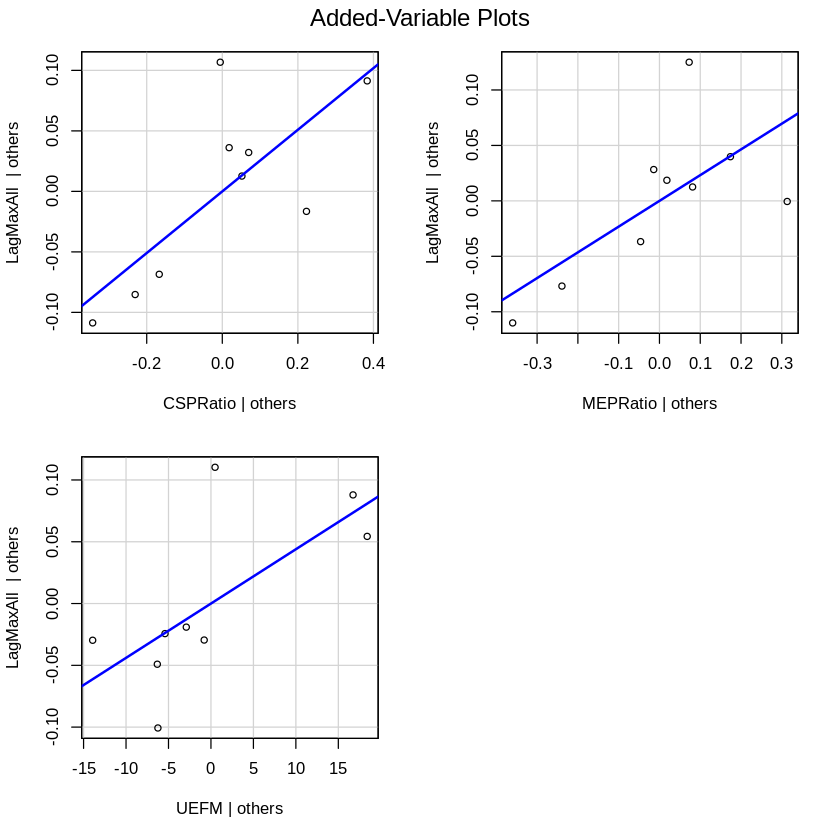

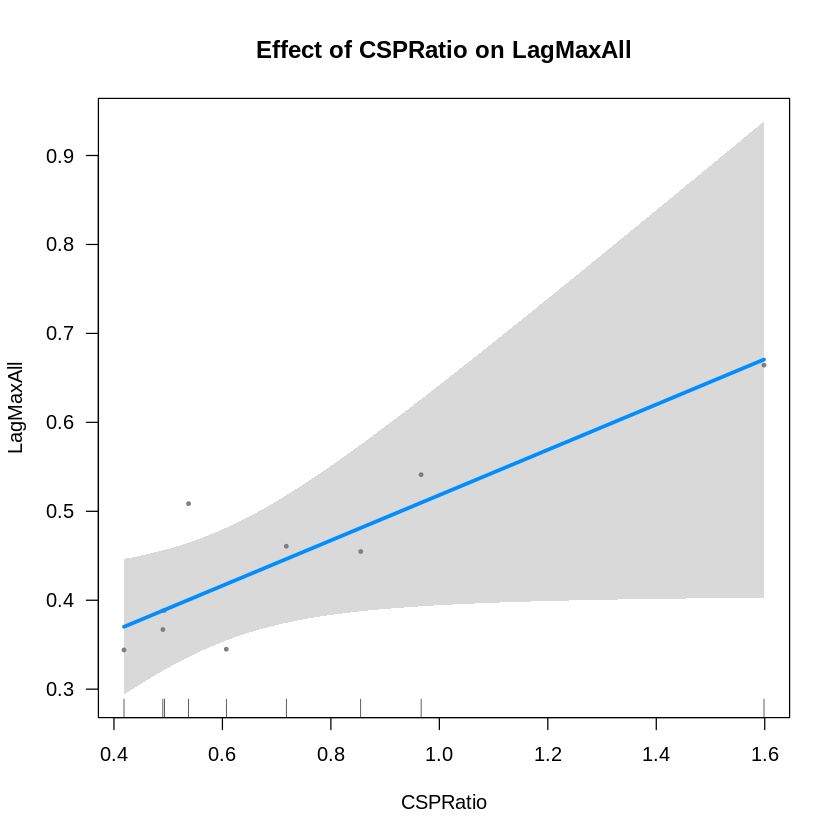

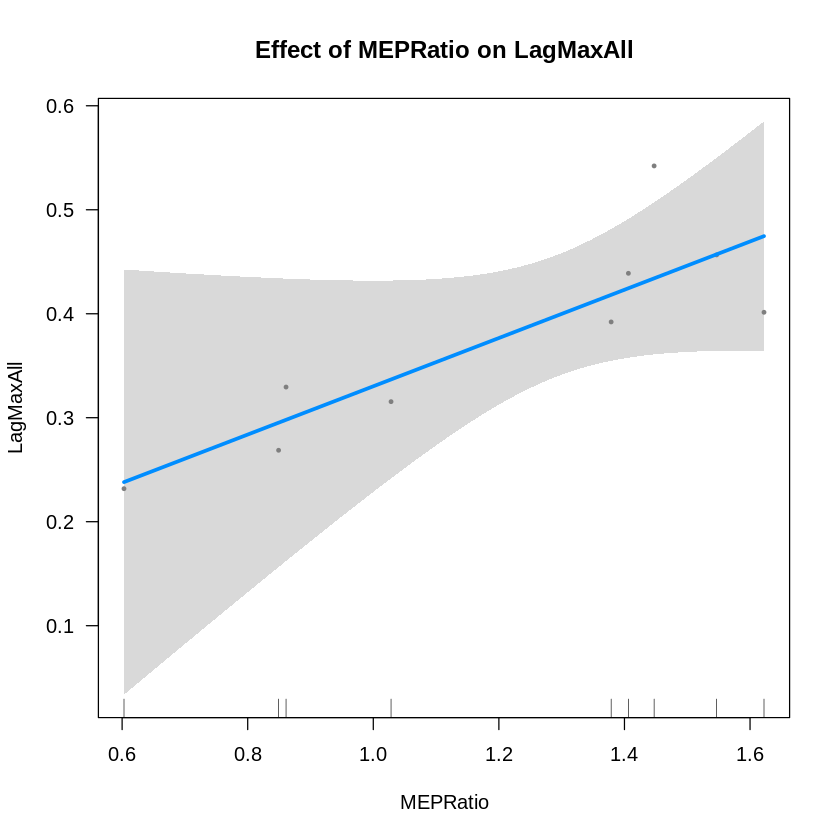

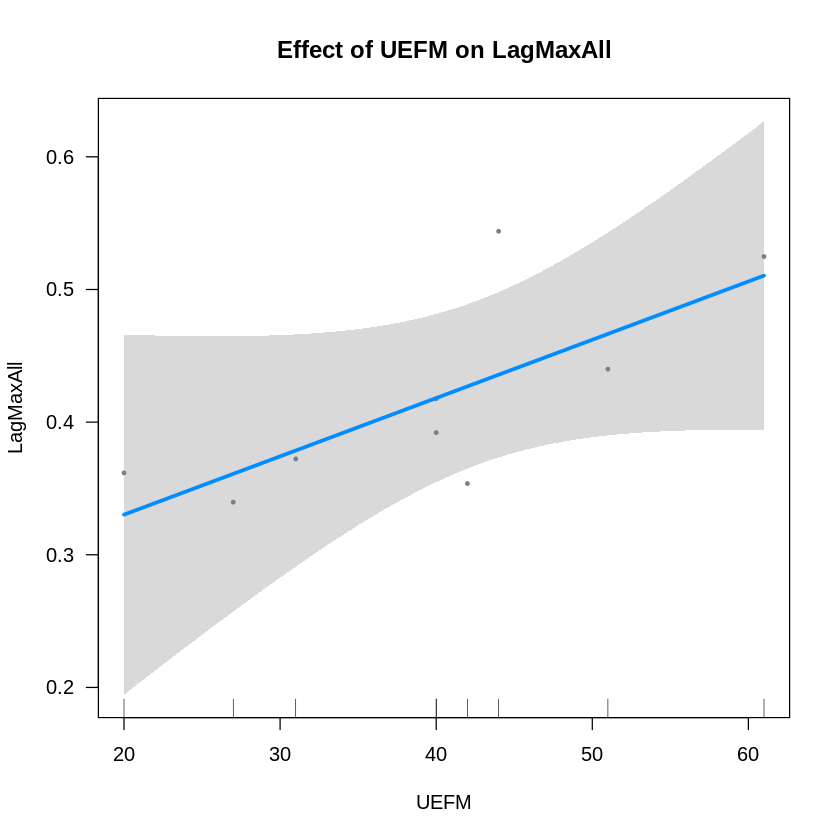

In [9]:
# ----------------------------------------------
# 6. Cross Facilitation: Bimanual Interference Analysis
# ----------------------------------------------
# --- Load and clean data ---
url <- "https://raw.githubusercontent.com/CunninghamLab/Publication-Data/refs/heads/main/1_Submitted_Jin_et_al_2025/Data/R_Data_6_BI_CF_ICI.csv"

data <- read.csv(url(url),
        header = TRUE,
        stringsAsFactors = TRUE,
        na.strings = c("", "N/A"))

data <- data %>%
  filter(!SubID %in% c("A016", "A073", "A074", "A017")) %>%
  filter(NPLevel == 70) %>%
  droplevels()

# --- Participant summary ---
included_subjects <- unique(data$SubID)
n_subjects <- length(included_subjects)

cat("Number of participants included:", n_subjects, "\n")
cat("Included SubIDs:\n")
print(included_subjects)

# --- Fit linear models ---
model1 <- lm(LagMaxAll ~ MEPRatio, data = data)
model2 <- lm(LagMaxAll ~ CSPRatio + MEPRatio, data = data)
model3 <- lm(LagMaxAll ~ CSPRatio + MEPRatio + UEFM, data = data)

# --- ANOVA tables for each model ---
cat("\n--- ANOVA Table for Each Model ---\n\n")
anova_output1 <- anova(model1)
anova_output2 <- anova(model2)
anova_output3 <- anova(model3)

cat("Model 1: LagMaxAll ~ MEPRatio\n")
print(anova_output1)
cat("\nModel 2: LagMaxAll ~ CSPRatio + MEPRatio\n")
print(anova_output2)
cat("\nModel 3: LagMaxAll ~ CSPRatio + MEPRatio + UEFM\n")
print(anova_output3)

# --- Model comparison (sequential) ---
cat("\n--- Sequential Model Comparison ---\n\n")
model_comparison <- anova(model1, model2, model3)
print(model_comparison)

# --- Correlation matrix ---
cat("\n--- Correlation Matrix ---\n\n")
cor_matrix <- cor(data[, c("MEPRatio", "CSPRatio", "LagMaxAll", "UEFM")], use = "complete.obs")
print(round(cor_matrix, 3))

# --- Significant regression summary for final model ---
cat("\n--- Regression Summary (Final Model) ---\n\n")

model1_summary <- summary(model1)
print(model1_summary)

model2_summary <- summary(model2)
print(model2_summary)

model3_summary <- summary(model3)
print(model3_summary)

# --- Diagnostic and Partial Plots ---
avPlots(model3, terms = ~ MEPRatio + CSPRatio + UEFM, id = FALSE)

# --- Grouped Visualization by CSP ---
#data$CSPGroup <- ifelse(data$CSPRatio > median(data$CSPRatio, na.rm = TRUE), "High", "Low")

#ggplot(data, aes(x = MEPRatio, y = LagMaxAll, color = CSPGroup)) +
#  geom_point() +
# geom_smooth(method = "lm", se = TRUE) +
#  labs(
#    title = "MEPRatio Effect on LagMaxAll by CSP Group",
#    x = "MEPRatio",
#    y = "LagMaxAll",
#    color = "CSP Group"
#  ) +
#  theme_bw(base_size = 14)


# Create predicted values

# Plot partial effect of each predictor
visreg(model3, "CSPRatio", partial = TRUE, rug = TRUE,
       main = "Effect of CSPRatio on LagMaxAll")

visreg(model3, "MEPRatio", partial = TRUE, rug = TRUE,
       main = "Effect of MEPRatio on LagMaxAll")

visreg(model3, "UEFM", partial = TRUE, rug = TRUE,
       main = "Effect of UEFM on LagMaxAll")

